1.Screen capture
2.Generate dataset and load it
3.Fit the model using SVC and calculate accuracy4.Prediction of image drawn in paint
4.Prediction of image drawn in paint

# Screen capture


In [31]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/9/"
    for i in range(0,12):
        time.sleep(4) #time for drawing images 
        im=ImageGrab.grab(bbox=(80,200,450,600)) #region where i am capturing my image
        print("Saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now ..........")

# Generate dataset


In [6]:
import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
 
#load the dataset
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
394,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
938,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1524,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#separation of dependent and independent variable
X = data.drop(["label"],axis=1)
Y= data["label"]

2


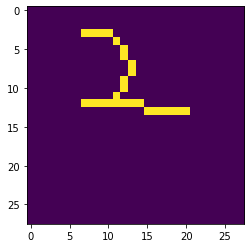

In [8]:
#preview of one image using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [10]:

 

 
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)
 
#Fit the model using svc and also to save the model using joblib
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")
 
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))


Accuracy=  1.0


In [12]:
#prediction of image drawn in paint
 
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
images_folder="img/"
 
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
           
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
        

cv2.destroyAllWindows()

C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 8


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1
Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3
Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 3
Prediction: 3
Prediction: 3
Prediction: 3


C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\manwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
